## NYPD Motor Vehicle Collision Data

### Overview

The Motor Vehicle Collisions Crash table contains details on the crash events. Each row represents a crash event. The Motor Vehicle Collisions data tables contain information from all police reported motor vehicle collisions in NYC. The dataset can be found by following this link: https://data.cityofnewyork.us/Public-Safety/NYPD-Motor-Vehicle-Collisions-Crashes/h9gi-nx95

The data dates from 2012 to the current day, with data being updated on a daily basis. At the time of this writing, there are 1.59 million rows, each row representing a crash event, and over 29 columns which represent date, time, borough, zip code, latitude, longitude, location, on and off street name, cross street name, number of persons injured, number of persons killed, number of pedestrians injured, number of pedestrians killed, number of cyclist injured, number of cyclist killed, number of motorist injured, number of motorist killed, contributing factors, vehicle type codes and collision ID.

Let's begin by bringing in a few libraries and then bring the first three million rows of NYPD Motor Vehicle Collision Data using pandas. Then we will take a look at the data itself, make a few diagnoses, and execute some data cleaning fixes to improve my dataset for analysis.

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import sys
from IPython.core.display import display, HTML

In [96]:
datanyc = pd.read_csv("https://data.cityofnewyork.us/resource/h9gi-nx95.csv?$limit=3000000")

And let's pull up the data dictionary supplied by the OpenData website for reference.

In [3]:
data_dict = pd.read_excel("https://data.cityofnewyork.us/api/views/h9gi-nx95/files/2e58023a-21a6-4c76-b9e8-0101bf7509ca?download=true&filename=MVCollisionsDataDictionary.xlsx",
                         sheet_name='Column Info')
data_dict

,Data Dictionary - Column Information,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,Table Name,Column Name,Column Description,Primary Key or Foreign Key,"Additional Notes \n(where applicable, includes..."
1,MV-Collisions - Crash,UNIQUE_ID,Unique record code generated by system,Primary Key for the crash table,NaN
2,MV-Collisions - Crash,ACCIDENT_DATE,Occurrence date of collision,NaN,NaN
3,MV-Collisions - Crash,ACCIDENT_TIME,Occurrence time of collision,NaN,NaN
4,MV-Collisions - Crash,BOROUGH,Borough where collision occurred,NaN,NaN
5,MV-Collisions - Crash,ZIP CODE,Postal code of incident occurrence,NaN,NaN
6,MV-Collisions - Crash,LATITUDE,Latitude coordinate for Global Coordinate Syst...,NaN,NaN
7,MV-Collisions - Crash,LONGITUDE,Longitude coordinate for Global Coordinate Sys...,NaN,NaN
8,MV-Collisions - Crash,LOCATION,"Latitude , Longitude pair",NaN,NaN
9,MV-Collisions - Crash,ON STREET NAME,Street on which the collision occurred,NaN,NaN


Let's see the first few rows of the dataset. 

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)
datanyc.head()

,date,time,borough,zip_code,latitude,longitude,location,on_street_name,off_street_name,cross_street_name,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,contributing_factor_vehicle_1,contributing_factor_vehicle_2,contributing_factor_vehicle_3,contributing_factor_vehicle_4,contributing_factor_vehicle_5,unique_key,vehicle_type_code1,vehicle_type_code2,vehicle_type_code_3,vehicle_type_code_4,vehicle_type_code_5
0,2019-08-08T00:00:00.000,20:27,MANHATTAN,10033,40.848118,-73.930890,POINT (-73.93089 40.848118),AMSTERDAM AVENUE,WEST 181 STREET,NaN,0.0,0.0,0,0,0,0,0,0,Driver Inattention/Distraction,Driver Inattention/Distraction,NaN,NaN,NaN,4185696,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
1,2019-08-30T00:00:00.000,19:00,NaN,NaN,40.743214,-73.951350,POINT (-73.95135 40.743214),PULASKI BRIDGE,JACKSON AVENUE,NaN,0.0,0.0,0,0,0,0,0,0,Failure to Yield Right-of-Way,Unspecified,NaN,NaN,NaN,4197471,Sedan,Sedan,NaN,NaN,NaN
2,2019-08-18T00:00:00.000,17:56,NaN,NaN,40.839725,-73.783700,POINT (-73.7837 40.839725),CITY ISLAND AVENUE,HORTON STREET,NaN,1.0,0.0,0,0,0,0,1,0,Unspecified,Unspecified,NaN,NaN,NaN,4190590,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
3,2019-09-02T00:00:00.000,1:00,BROOKLYN,11208,40.670254,-73.857280,POINT (-73.85728 40.670254),LINDEN BOULEVARD,SAPPHIRE STREET,NaN,0.0,0.0,0,0,0,0,0,0,Failure to Yield Right-of-Way,Unspecified,NaN,NaN,NaN,4223885,Sedan,NaN,NaN,NaN,NaN
4,2019-08-08T00:00:00.000,14:30,NaN,NaN,40.728603,-74.005325,POINT (-74.005325 40.728603),WEST HOUSTON STREET,NaN,NaN,0.0,0.0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,4185430,Bus,Box Truck,NaN,NaN,NaN


... And get some overall information about the contents of the data.

In [5]:
pd.options.display.max_info_rows = 5000000
datanyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1595863 entries, 0 to 1595862
Data columns (total 29 columns):
date                             1595863 non-null object
time                             1595863 non-null object
borough                          1112240 non-null object
zip_code                         1112049 non-null object
latitude                         1400333 non-null float64
longitude                        1400333 non-null float64
location                         1400333 non-null object
on_street_name                   1283621 non-null object
off_street_name                  1063439 non-null object
cross_street_name                220077 non-null object
number_of_persons_injured        1595846 non-null float64
number_of_persons_killed         1595832 non-null float64
number_of_pedestrians_injured    1595863 non-null int64
number_of_pedestrians_killed     1595863 non-null int64
number_of_cyclist_injured        1595863 non-null int64
number_of_cyclist_killed        

There are some missing values. Let's find the percentage of the missing values and see which columns have the most amount of missing values. We will get a mean of missing values and then round it to 4 decimal place.

In [6]:
pd.set_option('display.max_columns', 29)
datanyc.isnull().mean().round(4) * 100

date                              0.00
time                              0.00
borough                          30.30
zip_code                         30.32
latitude                         12.25
longitude                        12.25
location                         12.25
on_street_name                   19.57
off_street_name                  33.36
cross_street_name                86.21
number_of_persons_injured         0.00
number_of_persons_killed          0.00
number_of_pedestrians_injured     0.00
number_of_pedestrians_killed      0.00
number_of_cyclist_injured         0.00
number_of_cyclist_killed          0.00
number_of_motorist_injured        0.00
number_of_motorist_killed         0.00
contributing_factor_vehicle_1     0.27
contributing_factor_vehicle_2    13.43
contributing_factor_vehicle_3    93.54
contributing_factor_vehicle_4    98.66
contributing_factor_vehicle_5    99.66
unique_key                        0.00
vehicle_type_code1                0.34
vehicle_type_code2       

Wow some columns have a lot of missing values. For some it makes sense. For example contributing_factor_vehicle_2 or contributing_factor_vehicle_3 may be missing simply because there were no second or third vehicle contributing to the collision. Other than those, for example 'borough' column has 30% of its values missing. 

It looks like contributing_factor_vehicle_3, contributing_factor_vehicle_5, vehicle_type_code_3 and vehicle_type_code_5 have very few values, compared to the others. Lets take a aquick peek.

In [7]:
datanyc['contributing_factor_vehicle_1'].value_counts()

Unspecified                                              587958
Driver Inattention/Distraction                           296063
Failure to Yield Right-of-Way                             90524
Following Too Closely                                     78979
Backing Unsafely                                          61010
Other Vehicular                                           50754
Fatigued/Drowsy                                           46847
Turning Improperly                                        40835
Passing or Lane Usage Improper                            37277
Passing Too Closely                                       34169
Unsafe Lane Changing                                      30302
Traffic Control Disregarded                               24341
Driver Inexperience                                       23430
Lost Consciousness                                        19618
Pavement Slippery                                         15788
Prescription Medication                 

In [8]:
datanyc['contributing_factor_vehicle_3'].value_counts()

Unspecified                                              95922
Other Vehicular                                           1901
Driver Inattention/Distraction                            1376
Following Too Closely                                     1250
Fatigued/Drowsy                                            853
Pavement Slippery                                          290
Outside Car Distraction                                    147
Driver Inexperience                                        143
Reaction to Uninvolved Vehicle                             143
Traffic Control Disregarded                                137
Failure to Yield Right-of-Way                              120
Backing Unsafely                                            86
Unsafe Speed                                                77
Alcohol Involvement                                         76
Passing or Lane Usage Improper                              75
Turning Improperly                                     

We'll use the describe function which will "generate descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values." This will work on numeric and object series, and may point out any glaring wholes in the data.

In [9]:
datanyc.describe()

,latitude,longitude,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,unique_key
count,1.400333e+06,1.400333e+06,1.595846e+06,1.595832e+06,1.595863e+06,1.595863e+06,1.595863e+06,1.595863e+06,1.595863e+06,1.595863e+06,1.595863e+06
mean,4.069437e+01,-7.387704e+01,2.624765e-01,1.167416e-03,5.046611e-02,6.297533e-04,2.082510e-02,8.396711e-05,1.912852e-01,4.549263e-04,2.765198e+06
std,1.099378e+00,2.284379e+00,6.599610e-01,3.612709e-02,2.314794e-01,2.567946e-02,1.439698e-01,9.231108e-03,6.222734e-01,2.320963e-02,1.505727e+06
min,0.000000e+00,-2.013600e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.200000e+01
25%,4.066880e+01,-7.397725e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.026416e+06
50%,4.072258e+01,-7.392987e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.434054e+06
75%,4.076796e+01,-7.386705e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.833252e+06
max,4.334444e+01,0.000000e+00,4.300000e+01,8.000000e+00,2.700000e+01,6.000000e+00,4.000000e+00,2.000000e+00,4.300000e+01,5.000000e+00,4.233029e+06


Obviously averages and standard deviations don't tell a lot about latitude and longitude, but why we don't have full data counts in those columns. The rest of analysis doesn't appear to have obvious problems.

Let's take a look at some of those rows.

In [10]:
datanyc[datanyc['latitude'].isnull()]

,date,time,borough,zip_code,latitude,longitude,location,on_street_name,off_street_name,cross_street_name,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,contributing_factor_vehicle_1,contributing_factor_vehicle_2,contributing_factor_vehicle_3,contributing_factor_vehicle_4,contributing_factor_vehicle_5,unique_key,vehicle_type_code1,vehicle_type_code2,vehicle_type_code_3,vehicle_type_code_4,vehicle_type_code_5
25,2019-08-04T00:00:00.000,4:01,NaN,NaN,NaN,NaN,NaN,SOUTH CONDUIT AVENUE,LINDEN BOULEVARD,NaN,0.0,1.0,0,0,0,0,0,1,Unsafe Speed,NaN,NaN,NaN,NaN,4182741,Sedan,NaN,NaN,NaN,NaN
36,2019-08-29T00:00:00.000,15:34,NaN,NaN,NaN,NaN,NaN,BELT PARKWAY RAMP,NaN,NaN,0.0,0.0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,4197254,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
57,2019-08-10T00:00:00.000,3:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,415 MAIN STREET,0.0,0.0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,Unspecified,NaN,NaN,4186428,Station Wagon/Sport Utility Vehicle,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN
62,2019-08-13T00:00:00.000,9:30,NaN,NaN,NaN,NaN,NaN,JACKIE ROBINSON PKWY,NaN,NaN,0.0,0.0,0,0,0,0,0,0,Failure to Yield Right-of-Way,Unspecified,NaN,NaN,NaN,4188029,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN
71,2019-08-24T00:00:00.000,23:50,NaN,NaN,NaN,NaN,NaN,MERIDIAN RD,NEW YORK AVE,NaN,0.0,0.0,0,0,0,0,0,0,View Obstructed/Limited,NaN,NaN,NaN,NaN,4193896,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
88,2019-08-22T00:00:00.000,16:36,NaN,NaN,NaN,NaN,NaN,MAIN STREET,GRAND CENTRAL PARKWAY,NaN,0.0,0.0,0,0,0,0,0,0,Unsafe Lane Changing,Unspecified,NaN,NaN,NaN,4193079,Sedan,Sedan,NaN,NaN,NaN
90,2019-08-16T00:00:00.000,11:20,NaN,NaN,NaN,NaN,NaN,GRAND CENTRAL PARKWAY,NaN,NaN,1.0,0.0,0,0,0,0,1,0,Passenger Distraction,Unspecified,NaN,NaN,NaN,4190586,Taxi,Taxi,NaN,NaN,NaN
96,2019-09-01T00:00:00.000,17:03,NaN,NaN,NaN,NaN,NaN,NEW ENGLAND THRUWAY,NaN,NaN,4.0,0.0,0,0,0,0,4,0,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,4198032,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
97,2019-08-23T00:00:00.000,18:47,NaN,NaN,NaN,NaN,NaN,UNION TURNPIKE,NaN,NaN,1.0,0.0,0,0,0,0,1,0,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,4199437,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
98,2019-08-09T00:00:00.000,10:00,NaN,NaN,NaN,NaN,NaN,roosevelt avenue,stadium place south,NaN,0.0,0.0,0,0,0,0,0,0,Following Too Closely,Following Too Closely,NaN,NaN,NaN,4185768,Station Wagon/Sport Utility Vehicle,Bus,NaN,NaN,NaN


Seems like those rows have valid data. We wouldn't delete these rows, as the injury/fatality data may be useful, but we would drop them for location purposes.

If we really had some time, we would write/find a program to reverse map the on_street_name to the other fields.

Let's take a closer look at vehicle types.

In [11]:
datanyc['vehicle_type_code1'].value_counts()

PASSENGER VEHICLE                      715236
SPORT UTILITY / STATION WAGON          313500
Sedan                                  151360
Station Wagon/Sport Utility Vehicle    122291
TAXI                                    50670
VAN                                     26540
OTHER                                   23982
PICK-UP TRUCK                           23069
UNKNOWN                                 19929
Taxi                                    15635
SMALL COM VEH(4 TIRES)                  14559
LARGE COM VEH(6 OR MORE TIRES)          14527
BUS                                     14057
LIVERY VEHICLE                          10481
Pick-up Truck                           10168
Box Truck                                7965
Bus                                      6555
MOTORCYCLE                               6536
BICYCLE                                  5568
Bike                                     3916
Tractor Truck Diesel                     3496
Van                               

In [12]:
datanyc['vehicle_type_code_3'].value_counts()

PASSENGER VEHICLE                      63655
SPORT UTILITY / STATION WAGON          33161
Sedan                                  10248
Station Wagon/Sport Utility Vehicle     8477
UNKNOWN                                 3285
TAXI                                    3218
PICK-UP TRUCK                           2292
VAN                                     1489
OTHER                                   1108
Taxi                                     649
Pick-up Truck                            575
BICYCLE                                  533
SMALL COM VEH(4 TIRES)                   479
MOTORCYCLE                               464
LARGE COM VEH(6 OR MORE TIRES)           448
LIVERY VEHICLE                           424
BUS                                      403
Box Truck                                192
Bus                                      118
Motorcycle                                98
Bike                                      90
Tractor Truck Diesel                      87
Van       

We will leave this data for now, but modify the column names to standardize the dataset using the rename function.

## What Needs Attention?

#### STEP 1
* Some columns (such as vehicle_type_code_4, contributing_factor_vehicle_5) are nearly entirely empty. We'll remove those. 
* We will not be using some columns (e.g. unique_key, on_street_name, off_street_name, cross_street_name) so we can drop them completely. 
* We will change the data type of zip code to string.

#### STEP 2
* Cleaning or combining duplicated rows
* Renaming some columns
* Correcting misspellings
* Dealing with missing values
* Some dtype changes

#### STEP 3
* 'Latitude' and 'longitude' columns seem to be contained in the 'location' column. We like keeping the two values separate for now, so we can probably remove 'location' later.

#### STEP 4
* The values that we expect to be 'datetime' type are object ('date' and 'time' columns). We'll fix those.

#### STEP 5
* We are curious to see if collisions go up seasonally, so we'll make a new variable that bins the collisions by Spring (March, April, May), Summer (June, July, August), Fall (September, October, November), and Winter (December, January, February).

#### STEP 6
* We will do some general analyses to understand more about the data set.

Let's start! Just in case we mess anything up, we'll do all our cleaning in a new DataFrame called clean_nyc.

## Step 1: Dropping some columns and changing dtype
We'll begin by removing some columns, keeping only those missing fewer than 30% of their values. We'll also change the zip_code to a string. We can also drop some columns we know we're not going to use. Those operations are simple enough that we'll do them all before checking in again on the DataFrame.

In [13]:
clean_nyc = datanyc.dropna(thresh=(0.30 * datanyc.shape[0]), axis=1).copy()

In [14]:
clean_nyc.loc[:,'zip_code'] = clean_nyc['zip_code'].astype(str)

In [15]:
clean_nyc.drop(columns=["unique_key", "on_street_name", "off_street_name"], inplace=True)

Let's take a peek at what clean_nyc looks like now, as far as data types and number of columns (and values in those columns):

In [16]:
clean_nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1595863 entries, 0 to 1595862
Data columns (total 19 columns):
date                             1595863 non-null object
time                             1595863 non-null object
borough                          1112240 non-null object
zip_code                         1595863 non-null object
latitude                         1400333 non-null float64
longitude                        1400333 non-null float64
location                         1400333 non-null object
number_of_persons_injured        1595846 non-null float64
number_of_persons_killed         1595832 non-null float64
number_of_pedestrians_injured    1595863 non-null int64
number_of_pedestrians_killed     1595863 non-null int64
number_of_cyclist_injured        1595863 non-null int64
number_of_cyclist_killed         1595863 non-null int64
number_of_motorist_injured       1595863 non-null int64
number_of_motorist_killed        1595863 non-null int64
contributing_factor_vehicle_1    1

And what about the percentage of the missing values now?

In [17]:
pd.set_option('display.max_columns', 29)
clean_nyc.isnull().mean().round(4) * 100

date                              0.00
time                              0.00
borough                          30.30
zip_code                          0.00
latitude                         12.25
longitude                        12.25
location                         12.25
number_of_persons_injured         0.00
number_of_persons_killed          0.00
number_of_pedestrians_injured     0.00
number_of_pedestrians_killed      0.00
number_of_cyclist_injured         0.00
number_of_cyclist_killed          0.00
number_of_motorist_injured        0.00
number_of_motorist_killed         0.00
contributing_factor_vehicle_1     0.27
contributing_factor_vehicle_2    13.43
vehicle_type_code1                0.34
vehicle_type_code2               16.46
dtype: float64

So far, so good.

## Step 2: Getting Rid of Duplicated Rows, Correcting Misspellings and Renaming

We will modify the column names to standardize the dataset using the rename function.

In [18]:
datanyc.rename(columns={'vehicle_type_code1':'vehicle_type_code_1',
                        'vehicle_type_code2':'vehicle_type_code_2',
                       }, 
               inplace=True)

Let's take a closer look at vehicle_type_code_1.

In [19]:
datanyc['vehicle_type_code_1'].value_counts()

PASSENGER VEHICLE                      715236
SPORT UTILITY / STATION WAGON          313500
Sedan                                  151360
Station Wagon/Sport Utility Vehicle    122291
TAXI                                    50670
VAN                                     26540
OTHER                                   23982
PICK-UP TRUCK                           23069
UNKNOWN                                 19929
Taxi                                    15635
SMALL COM VEH(4 TIRES)                  14559
LARGE COM VEH(6 OR MORE TIRES)          14527
BUS                                     14057
LIVERY VEHICLE                          10481
Pick-up Truck                           10168
Box Truck                                7965
Bus                                      6555
MOTORCYCLE                               6536
BICYCLE                                  5568
Bike                                     3916
Tractor Truck Diesel                     3496
Van                               

'Sports utility/station wagon', 'sedan', and then 'station wagon/sport utility' were the largest number of vehicles involved in the crashes. We could combine 'sports utility/station wagon' and 'station wagon/sport utility' groups so that 'sport utility / station wagon' and 'station wagon/sport utility' vehicles can be under 'SUV'.

In [20]:
datanyc['vehicle_type_code_1'] = datanyc['vehicle_type_code_1'].str.replace('SPORT UTILITY / STATION WAGON', 'SUV')
datanyc['vehicle_type_code_1'] = datanyc['vehicle_type_code_1'].str.replace('Station Wagon/Sport Utility Vehicle', 'SUV')
datanyc['vehicle_type_code_1'].value_counts()

PASSENGER VEHICLE                 715236
SUV                               435797
Sedan                             151360
TAXI                               50670
VAN                                26540
OTHER                              23982
PICK-UP TRUCK                      23069
UNKNOWN                            19929
Taxi                               15635
SMALL COM VEH(4 TIRES)             14559
LARGE COM VEH(6 OR MORE TIRES)     14527
BUS                                14057
LIVERY VEHICLE                     10481
Pick-up Truck                      10168
Box Truck                           7965
Bus                                 6555
MOTORCYCLE                          6536
BICYCLE                             5568
Bike                                3916
Tractor Truck Diesel                3496
Van                                 2708
TK                                  2485
AMBULANCE                           2406
BU                                  2229
Motorcycle      

When looking at value_counts() of contributing factors, we noted some duplicates. Let's clean those up now, first by looking at the unique values.

In [21]:
datanyc['contributing_factor_vehicle_1'].unique()

array(['Driver Inattention/Distraction', 'Failure to Yield Right-of-Way',
       'Unspecified', 'Turning Improperly', 'Traffic Control Disregarded',
       'Following Too Closely', 'Unsafe Speed',
       'Passing or Lane Usage Improper', 'Backing Unsafely',
       'Obstruction/Debris', 'Driver Inexperience', 'Alcohol Involvement',
       'Other Vehicular', 'Passing Too Closely', 'Fatigued/Drowsy',
       'View Obstructed/Limited', 'Aggressive Driving/Road Rage',
       'Reaction to Uninvolved Vehicle',
       'Pedestrian/Bicyclist/Other Pedestrian Error/Confusion',
       'Unsafe Lane Changing', 'Passenger Distraction',
       'Oversized Vehicle', 'Glare', nan, 'Brakes Defective',
       'Pavement Slippery', 'Pavement Defective', 'Failure to Keep Right',
       'Steering Failure', 'Outside Car Distraction',
       'Lost Consciousness', 'Fell Asleep', 'Accelerator Defective',
       'Tire Failure/Inadequate', 'Drugs (illegal)', 'Animals Action',
       'Traffic Control Device Improper/N

There are some misspellings (e.g. "Illnes" missspelled in addition to 'Illness', in 'Drugs (illegal)' and 'Drugs (Illegal)'). Let's fix those.

In [22]:
datanyc['contributing_factor_vehicle_1'].replace('Illnes', 'Illness', inplace=True)
datanyc['contributing_factor_vehicle_1'].replace('Drugs (illegal)', 'Drugs (Illegal)', inplace=True)
datanyc['contributing_factor_vehicle_1'].unique()

array(['Driver Inattention/Distraction', 'Failure to Yield Right-of-Way',
       'Unspecified', 'Turning Improperly', 'Traffic Control Disregarded',
       'Following Too Closely', 'Unsafe Speed',
       'Passing or Lane Usage Improper', 'Backing Unsafely',
       'Obstruction/Debris', 'Driver Inexperience', 'Alcohol Involvement',
       'Other Vehicular', 'Passing Too Closely', 'Fatigued/Drowsy',
       'View Obstructed/Limited', 'Aggressive Driving/Road Rage',
       'Reaction to Uninvolved Vehicle',
       'Pedestrian/Bicyclist/Other Pedestrian Error/Confusion',
       'Unsafe Lane Changing', 'Passenger Distraction',
       'Oversized Vehicle', 'Glare', nan, 'Brakes Defective',
       'Pavement Slippery', 'Pavement Defective', 'Failure to Keep Right',
       'Steering Failure', 'Outside Car Distraction',
       'Lost Consciousness', 'Fell Asleep', 'Accelerator Defective',
       'Tire Failure/Inadequate', 'Drugs (Illegal)', 'Animals Action',
       'Traffic Control Device Improper/N

In [23]:
datanyc['contributing_factor_vehicle_2'].unique()

array(['Driver Inattention/Distraction', 'Unspecified', nan,
       'Following Too Closely', 'Passing or Lane Usage Improper',
       'Passing Too Closely', 'Failure to Yield Right-of-Way',
       'Aggressive Driving/Road Rage',
       'Pedestrian/Bicyclist/Other Pedestrian Error/Confusion', 'Glare',
       'Unsafe Speed', 'Backing Unsafely', 'Failure to Keep Right',
       'View Obstructed/Limited', 'Reaction to Uninvolved Vehicle',
       'Other Vehicular', 'Driver Inexperience', 'Turning Improperly',
       'Traffic Control Disregarded', 'Unsafe Lane Changing',
       'Obstruction/Debris', 'Pavement Slippery', 'Oversized Vehicle',
       'Fatigued/Drowsy', 'Alcohol Involvement',
       'Outside Car Distraction', 'Passenger Distraction',
       'Tinted Windows', 'Illnes', 'Lane Marking Improper/Inadequate',
       'Animals Action', 'Traffic Control Device Improper/Non-Working',
       'Accelerator Defective', 'Tire Failure/Inadequate',
       'Brakes Defective', 'Fell Asleep', 'Drive

contributing_factor_vehicle_2 had the same problem with 'Illnes' being missspelled, so we will fix it now.

In [24]:
datanyc['contributing_factor_vehicle_2'].replace('Illnes', 'Illness', inplace=True)

The crashes vehicle_type_code columns had a few similare problems, which we will clean now.

In [25]:
datanyc['vehicle_type_code_1'].replace('TAXI', 'Taxi', inplace=True)
datanyc['vehicle_type_code_2'].replace('TAXI', 'Taxi', inplace=True)
datanyc['vehicle_type_code_3'].replace('TAXI', 'Taxi', inplace=True)
datanyc['vehicle_type_code_4'].replace('TAXI', 'Taxi', inplace=True)
datanyc['vehicle_type_code_5'].replace('TAXI', 'Taxi', inplace=True)
datanyc['vehicle_type_code_1'].replace('PICK-UP TRUCK', 'Pick-up Truck', inplace=True)
datanyc['vehicle_type_code_2'].replace('PICK-UP TRUCK', 'Pick-up Truck', inplace=True)
datanyc['vehicle_type_code_3'].replace('PICK-UP TRUCK', 'Pick-up Truck', inplace=True)
datanyc['vehicle_type_code_4'].replace('PICK-UP TRUCK', 'Pick-up Truck', inplace=True)
datanyc['vehicle_type_code_5'].replace('PICK-UP TRUCK', 'Pick-up Truck', inplace=True)
datanyc['vehicle_type_code_1'].replace('AMBULANCE', 'Ambulance', inplace=True)
datanyc['vehicle_type_code_2'].replace('AMBULANCE', 'Ambulance', inplace=True)
datanyc['vehicle_type_code_3'].replace('AMBULANCE', 'Ambulance', inplace=True)
datanyc['vehicle_type_code_4'].replace('AMBULANCE', 'Ambulance', inplace=True)
datanyc['vehicle_type_code_5'].replace('AMBULANCE', 'Ambulance', inplace=True)
datanyc['vehicle_type_code_1'].replace('SPORT UTILITY / STATION WAGON', 'Station Wagon/Sport Utility Vehicle', inplace=True)
datanyc['vehicle_type_code_2'].replace('SPORT UTILITY / STATION WAGON', 'Station Wagon/Sport Utility Vehicle', inplace=True)
datanyc['vehicle_type_code_3'].replace('SPORT UTILITY / STATION WAGON', 'Station Wagon/Sport Utility Vehicle', inplace=True)
datanyc['vehicle_type_code_4'].replace('SPORT UTILITY / STATION WAGON', 'Station Wagon/Sport Utility Vehicle', inplace=True)
datanyc['vehicle_type_code_5'].replace('SPORT UTILITY / STATION WAGON', 'Station Wagon/Sport Utility Vehicle', inplace=True)

In [26]:
datanyc['vehicle_type_code_1'].value_counts()

PASSENGER VEHICLE                 715236
SUV                               435797
Sedan                             151360
Taxi                               66305
Pick-up Truck                      33237
VAN                                26540
OTHER                              23982
UNKNOWN                            19929
SMALL COM VEH(4 TIRES)             14559
LARGE COM VEH(6 OR MORE TIRES)     14527
BUS                                14057
LIVERY VEHICLE                     10481
Box Truck                           7965
Bus                                 6555
MOTORCYCLE                          6536
BICYCLE                             5568
Bike                                3916
Tractor Truck Diesel                3496
Ambulance                           3339
Van                                 2708
TK                                  2485
BU                                  2229
Motorcycle                          1958
Convertible                         1333
Dump            

Next, we will focus just on vehicle_type_code_1. 

In [27]:
datanyc['vehicle_type_code_1'].replace('Other', 'Unknown', inplace=True)
datanyc['vehicle_type_code_1'].replace('BUS', 'Bus', inplace=True)
datanyc['vehicle_type_code_1'].replace('Box T', 'Box Truck', inplace=True)
datanyc['vehicle_type_code_1'].replace('GARBA', 'Garbage or Refuse', inplace=True)
datanyc['vehicle_type_code_1'].replace('CAB', 'Cab', inplace=True)
datanyc['vehicle_type_code_1'].replace('fdny', 'FIRE TRUCK', inplace=True)
datanyc['vehicle_type_code_1'].unique()

array(['Sedan', 'Bus', 'Ambulance', 'SUV', 'Pick-up Truck',
       'Tractor Truck Diesel', 'Taxi', 'Bike', 'Box Truck', 'Van', nan,
       'Fire', 'Motorcycle', 'Tractor Truck Gasoline', 'Convertible',
       'E-Bik', 'Motorscooter', 'prks', 'Flat Rack', 'PASSENGER VEHICLE',
       'Dump', 'Flat Bed', 'POWER', 'Garbage or Refuse', 'E-Sco', 'UTIL',
       'Motorbike', 'Trail', 'Tow Truck / Wrecker', 'Carry All', 'Ambul',
       'tk', 'PK', 'Multi-Wheeled Vehicle',
       'LARGE COM VEH(6 OR MORE TIRES)', 'Lift Boom', 'COMME', 'Moped',
       'Tanker', 'Beverage Truck', 'MINI', 'TRAIL', 'fire', 'CONT',
       'Chassis Cab', 'Lunch Wagon', 'Stake or Rack', 'Van Camper',
       'REFG', 'LIMO', 'van', 'forkl', 'School Bus', 'Motorized Home',
       'FIRE', 'AMBUL', 'BoxTr', 'Refrigerated Van', 'Concrete Mixer',
       '3-Door', 'PICK-', 'E BIK', 'van t', 'DELIV', 'WINEB',
       'Pickup with mounted Camper', 'Parce', 'TRACT', 'HI TA', 'FDNY',
       '35 FT', 'MOPED', 'Bulk Agriculture', 'AM

In [28]:
datanyc['vehicle_type_code_1'].replace('VAN T', 'Van', inplace=True)
datanyc['vehicle_type_code_1'].replace('van', 'Van', inplace=True)
datanyc['vehicle_type_code_1'].replace('VAN/T', 'Van', inplace=True)
datanyc['vehicle_type_code_1'].replace('van t', 'Van', inplace=True)
datanyc['vehicle_type_code_1'].replace('van', 'Van', inplace=True)
datanyc['vehicle_type_code_1'].replace('VAN', 'Van', inplace=True)
datanyc['vehicle_type_code_1'].replace('AMBU', 'Ambulance', inplace=True)
datanyc['vehicle_type_code_1'].replace('Ambul', 'Ambulance', inplace=True)
datanyc['vehicle_type_code_1'].replace('AMB', 'Ambulance', inplace=True)
datanyc['vehicle_type_code_1'].replace('Ambu', 'Ambulance', inplace=True)
datanyc['vehicle_type_code_1'].replace('AMBUL', 'Ambulance', inplace=True)
datanyc['vehicle_type_code_1'].replace('ambul', 'Ambulance', inplace=True)
datanyc['vehicle_type_code_1'].replace('Ambu', 'Ambulance', inplace=True)
datanyc['vehicle_type_code_1'].replace('Fire', 'FIRE TRUCK', inplace=True)
datanyc['vehicle_type_code_1'].replace('fire', 'FIRE TRUCK', inplace=True)
datanyc['vehicle_type_code_1'].replace('FIRE', 'FIRE TRUCK', inplace=True)
datanyc['vehicle_type_code_1'].replace('FIRET', 'FIRE TRUCK', inplace=True)
datanyc['vehicle_type_code_1'].replace('FDNY', 'FIRE TRUCK', inplace=True)
datanyc['vehicle_type_code_1'].unique()

array(['Sedan', 'Bus', 'Ambulance', 'SUV', 'Pick-up Truck',
       'Tractor Truck Diesel', 'Taxi', 'Bike', 'Box Truck', 'Van', nan,
       'FIRE TRUCK', 'Motorcycle', 'Tractor Truck Gasoline',
       'Convertible', 'E-Bik', 'Motorscooter', 'prks', 'Flat Rack',
       'PASSENGER VEHICLE', 'Dump', 'Flat Bed', 'POWER',
       'Garbage or Refuse', 'E-Sco', 'UTIL', 'Motorbike', 'Trail',
       'Tow Truck / Wrecker', 'Carry All', 'tk', 'PK',
       'Multi-Wheeled Vehicle', 'LARGE COM VEH(6 OR MORE TIRES)',
       'Lift Boom', 'COMME', 'Moped', 'Tanker', 'Beverage Truck', 'MINI',
       'TRAIL', 'CONT', 'Chassis Cab', 'Lunch Wagon', 'Stake or Rack',
       'Van Camper', 'REFG', 'LIMO', 'forkl', 'School Bus',
       'Motorized Home', 'BoxTr', 'Refrigerated Van', 'Concrete Mixer',
       '3-Door', 'PICK-', 'E BIK', 'DELIV', 'WINEB',
       'Pickup with mounted Camper', 'Parce', 'TRACT', 'HI TA', '35 FT',
       'MOPED', 'Bulk Agriculture', 'CITY', 'TRLR', 'Pedicab', 'dump',
       'Tow Truck', 

Even in one column you can see how much variation there is. We would suggest that whoever created this dataset turns this from a "fill in the blank" text field to a select field froma predetermined loist, to get better data fidelity, and we hope by this point, you can see why.

Next, we will rename some of the columns to make things easier while analyzing the data.

In [29]:
clean_nyc.rename(columns={'number_of_persons_injured' : 'persons_injured',
                        'number_of_persons_killed' : 'persons_killed',
                        'number_of_pedestrians_injured' : 'pedestrians_injured',
                        'number_of_pedestrians_killed' : 'pedestrians_killed',
                        'number_of_cyclist_injured' : 'cyclist_injured',
                        'number_of_cyclist_killed' : 'cyclist_killed',
                        'number_of_motorist_injured'  : 'motorist_injured',
                        'number_of_motorist_killed' : 'motorist_killed'},inplace=True)
clean_nyc.head()

,date,time,borough,zip_code,latitude,longitude,location,persons_injured,persons_killed,pedestrians_injured,pedestrians_killed,cyclist_injured,cyclist_killed,motorist_injured,motorist_killed,contributing_factor_vehicle_1,contributing_factor_vehicle_2,vehicle_type_code1,vehicle_type_code2
0,2019-08-08T00:00:00.000,20:27,MANHATTAN,10033.0,40.848118,-73.930890,POINT (-73.93089 40.848118),0.0,0.0,0,0,0,0,0,0,Driver Inattention/Distraction,Driver Inattention/Distraction,Sedan,Station Wagon/Sport Utility Vehicle
1,2019-08-30T00:00:00.000,19:00,NaN,nan,40.743214,-73.951350,POINT (-73.95135 40.743214),0.0,0.0,0,0,0,0,0,0,Failure to Yield Right-of-Way,Unspecified,Sedan,Sedan
2,2019-08-18T00:00:00.000,17:56,NaN,nan,40.839725,-73.783700,POINT (-73.7837 40.839725),1.0,0.0,0,0,0,0,1,0,Unspecified,Unspecified,Sedan,Station Wagon/Sport Utility Vehicle
3,2019-09-02T00:00:00.000,1:00,BROOKLYN,11208.0,40.670254,-73.857280,POINT (-73.85728 40.670254),0.0,0.0,0,0,0,0,0,0,Failure to Yield Right-of-Way,Unspecified,Sedan,NaN
4,2019-08-08T00:00:00.000,14:30,NaN,nan,40.728603,-74.005325,POINT (-74.005325 40.728603),0.0,0.0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,Bus,Box Truck


Great! We can see that 'persons_injured' and 'persons_killed' column values are float. Let's change them from float to integer. To do so, we will first get rid of any missing values in the 'persons_injured' and 'persons_killed' columns.

In [30]:
clean_nyc.dropna(subset = ['persons_injured'], how='all', inplace=True)
clean_nyc.dropna(subset = ['persons_killed'], how='all', inplace=True)
clean_nyc['persons_injured'] = clean_nyc.persons_injured.astype(int)
clean_nyc['persons_killed'] = clean_nyc.persons_killed.astype(int)
clean_nyc.head()

,date,time,borough,zip_code,latitude,longitude,location,persons_injured,persons_killed,pedestrians_injured,pedestrians_killed,cyclist_injured,cyclist_killed,motorist_injured,motorist_killed,contributing_factor_vehicle_1,contributing_factor_vehicle_2,vehicle_type_code1,vehicle_type_code2
0,2019-08-08T00:00:00.000,20:27,MANHATTAN,10033.0,40.848118,-73.930890,POINT (-73.93089 40.848118),0,0,0,0,0,0,0,0,Driver Inattention/Distraction,Driver Inattention/Distraction,Sedan,Station Wagon/Sport Utility Vehicle
1,2019-08-30T00:00:00.000,19:00,NaN,nan,40.743214,-73.951350,POINT (-73.95135 40.743214),0,0,0,0,0,0,0,0,Failure to Yield Right-of-Way,Unspecified,Sedan,Sedan
2,2019-08-18T00:00:00.000,17:56,NaN,nan,40.839725,-73.783700,POINT (-73.7837 40.839725),1,0,0,0,0,0,1,0,Unspecified,Unspecified,Sedan,Station Wagon/Sport Utility Vehicle
3,2019-09-02T00:00:00.000,1:00,BROOKLYN,11208.0,40.670254,-73.857280,POINT (-73.85728 40.670254),0,0,0,0,0,0,0,0,Failure to Yield Right-of-Way,Unspecified,Sedan,NaN
4,2019-08-08T00:00:00.000,14:30,NaN,nan,40.728603,-74.005325,POINT (-74.005325 40.728603),0,0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,Bus,Box Truck


Next, we want to change all my values to lower case letters.

In [31]:
clean_nyc1 = clean_nyc.applymap(lambda s:s.lower() if type(s) == str else s)
clean_nyc1.head()

,date,time,borough,zip_code,latitude,longitude,location,persons_injured,persons_killed,pedestrians_injured,pedestrians_killed,cyclist_injured,cyclist_killed,motorist_injured,motorist_killed,contributing_factor_vehicle_1,contributing_factor_vehicle_2,vehicle_type_code1,vehicle_type_code2
0,2019-08-08t00:00:00.000,20:27,manhattan,10033.0,40.848118,-73.930890,point (-73.93089 40.848118),0,0,0,0,0,0,0,0,driver inattention/distraction,driver inattention/distraction,sedan,station wagon/sport utility vehicle
1,2019-08-30t00:00:00.000,19:00,NaN,nan,40.743214,-73.951350,point (-73.95135 40.743214),0,0,0,0,0,0,0,0,failure to yield right-of-way,unspecified,sedan,sedan
2,2019-08-18t00:00:00.000,17:56,NaN,nan,40.839725,-73.783700,point (-73.7837 40.839725),1,0,0,0,0,0,1,0,unspecified,unspecified,sedan,station wagon/sport utility vehicle
3,2019-09-02t00:00:00.000,1:00,brooklyn,11208.0,40.670254,-73.857280,point (-73.85728 40.670254),0,0,0,0,0,0,0,0,failure to yield right-of-way,unspecified,sedan,NaN
4,2019-08-08t00:00:00.000,14:30,NaN,nan,40.728603,-74.005325,point (-74.005325 40.728603),0,0,0,0,0,0,0,0,driver inattention/distraction,unspecified,bus,box truck


We replaced the missing values in the 'latitude' and 'longitude' columns with zeros, now we also want to do something with the missing values in other columns. Let's see what values we have in the 'contributing_factor_vehicle_1' and 'contributing_factor_vehicle_2' columns.

In [32]:
clean_nyc1['contributing_factor_vehicle_1'].value_counts(dropna=False)

unspecified                                              587941
driver inattention/distraction                           296057
failure to yield right-of-way                             90524
following too closely                                     78979
backing unsafely                                          61010
other vehicular                                           50753
fatigued/drowsy                                           46847
turning improperly                                        40834
passing or lane usage improper                            37277
passing too closely                                       34169
unsafe lane changing                                      30301
traffic control disregarded                               24341
driver inexperience                                       23429
lost consciousness                                        19617
pavement slippery                                         15788
prescription medication                 

We can combine the missing and unspecified values.

In [33]:
clean_nyc1['contributing_factor_vehicle_1'].fillna(value='Unspecified', inplace=True)
clean_nyc1['contributing_factor_vehicle_1'].value_counts(dropna=False)

unspecified                                              587941
driver inattention/distraction                           296057
failure to yield right-of-way                             90524
following too closely                                     78979
backing unsafely                                          61010
other vehicular                                           50753
fatigued/drowsy                                           46847
turning improperly                                        40834
passing or lane usage improper                            37277
passing too closely                                       34169
unsafe lane changing                                      30301
traffic control disregarded                               24341
driver inexperience                                       23429
lost consciousness                                        19617
pavement slippery                                         15788
prescription medication                 

Let's see the values for the 'contributing_factor_vehicle_2' column.

In [34]:
clean_nyc1['contributing_factor_vehicle_2'].value_counts(dropna=False)

unspecified                                              1161335
NaN                                                       214219
driver inattention/distraction                             72602
other vehicular                                            26624
failure to yield right-of-way                              13888
following too closely                                      13389
fatigued/drowsy                                            10823
passing or lane usage improper                              9291
turning improperly                                          7688
backing unsafely                                            6976
passing too closely                                         6514
driver inexperience                                         5440
traffic control disregarded                                 5273
lost consciousness                                          5223
unsafe lane changing                                        5222
pavement slippery        

We can do the same for this column as well.

In [35]:
clean_nyc1['contributing_factor_vehicle_2'].fillna(value='Unspecified', inplace=True)
clean_nyc1['contributing_factor_vehicle_1'].value_counts(dropna=False)

unspecified                                              587941
driver inattention/distraction                           296057
failure to yield right-of-way                             90524
following too closely                                     78979
backing unsafely                                          61010
other vehicular                                           50753
fatigued/drowsy                                           46847
turning improperly                                        40834
passing or lane usage improper                            37277
passing too closely                                       34169
unsafe lane changing                                      30301
traffic control disregarded                               24341
driver inexperience                                       23429
lost consciousness                                        19617
pavement slippery                                         15788
prescription medication                 

## Step 3 - 'Latitude' and 'longitude' Columns

The 'location' column is simply a concatenation of 'latitude' and 'longitude' columns.

In [36]:
clean_nyc[["latitude", "longitude", "location"]].head(30)

,latitude,longitude,location
0,40.848118,-73.930890,POINT (-73.93089 40.848118)
1,40.743214,-73.951350,POINT (-73.95135 40.743214)
2,40.839725,-73.783700,POINT (-73.7837 40.839725)
3,40.670254,-73.857280,POINT (-73.85728 40.670254)
4,40.728603,-74.005325,POINT (-74.005325 40.728603)
5,40.784943,-73.946594,POINT (-73.946594 40.784943)
6,40.733536,-73.870350,POINT (-73.87035 40.733536)
7,40.676900,-73.781580,POINT (-73.78158 40.6769)
8,40.689690,-73.992370,POINT (-73.99237 40.68969)
9,40.656610,-73.930910,POINT (-73.93091 40.65661)


Before we quickly do something, let's first see if it's true that all the location data follows the same pattern we see right now:

In [37]:
clean_nyc['location'].str.match('POINT \(-7\d\.\d+ \d{2}\.\d+\)', na=False).value_counts()

True     1399151
False     196676
Name: location, dtype: int64

196679 rows where that's not the case! More than we expected! Let's check them out!

In [38]:
clean_nyc[~clean_nyc['location'].str.match('POINT \(-7\d\.\d+ \d{2}\.\d+\)', na=False)]

,date,time,borough,zip_code,latitude,longitude,location,persons_injured,persons_killed,pedestrians_injured,pedestrians_killed,cyclist_injured,cyclist_killed,motorist_injured,motorist_killed,contributing_factor_vehicle_1,contributing_factor_vehicle_2,vehicle_type_code1,vehicle_type_code2
25,2019-08-04T00:00:00.000,4:01,NaN,nan,NaN,NaN,NaN,0,1,0,0,0,0,0,1,Unsafe Speed,NaN,Sedan,NaN
36,2019-08-29T00:00:00.000,15:34,NaN,nan,NaN,NaN,NaN,0,0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle
57,2019-08-10T00:00:00.000,3:45,NaN,nan,NaN,NaN,NaN,0,0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,Station Wagon/Sport Utility Vehicle,Sedan
62,2019-08-13T00:00:00.000,9:30,NaN,nan,NaN,NaN,NaN,0,0,0,0,0,0,0,0,Failure to Yield Right-of-Way,Unspecified,Station Wagon/Sport Utility Vehicle,Sedan
71,2019-08-24T00:00:00.000,23:50,NaN,nan,NaN,NaN,NaN,0,0,0,0,0,0,0,0,View Obstructed/Limited,NaN,Station Wagon/Sport Utility Vehicle,NaN
88,2019-08-22T00:00:00.000,16:36,NaN,nan,NaN,NaN,NaN,0,0,0,0,0,0,0,0,Unsafe Lane Changing,Unspecified,Sedan,Sedan
90,2019-08-16T00:00:00.000,11:20,NaN,nan,NaN,NaN,NaN,1,0,0,0,0,0,1,0,Passenger Distraction,Unspecified,Taxi,Taxi
96,2019-09-01T00:00:00.000,17:03,NaN,nan,NaN,NaN,NaN,4,0,0,0,0,0,4,0,Driver Inattention/Distraction,Unspecified,Sedan,Station Wagon/Sport Utility Vehicle
97,2019-08-23T00:00:00.000,18:47,NaN,nan,NaN,NaN,NaN,1,0,0,0,0,0,1,0,Driver Inattention/Distraction,Unspecified,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle
98,2019-08-09T00:00:00.000,10:00,NaN,nan,NaN,NaN,NaN,0,0,0,0,0,0,0,0,Following Too Closely,Following Too Closely,Station Wagon/Sport Utility Vehicle,Bus


Ahh those sweet missing values... As we've seen before, latitude, longitude	and location columns have 12% of their values missing each. While we're at it, let's make some changes with the help of fillna function.

In [39]:
clean_nyc['location'] = clean_nyc['location'].fillna(0)
clean_nyc['latitude'] = clean_nyc['latitude'].fillna(0)
clean_nyc['longitude'] = clean_nyc['longitude'].fillna(0)

In [40]:
clean_nyc[~clean_nyc['location'].str.match('POINT \(-7\d\.\d+ \d{2}\.\d+\)', na=False)]

,date,time,borough,zip_code,latitude,longitude,location,persons_injured,persons_killed,pedestrians_injured,pedestrians_killed,cyclist_injured,cyclist_killed,motorist_injured,motorist_killed,contributing_factor_vehicle_1,contributing_factor_vehicle_2,vehicle_type_code1,vehicle_type_code2
25,2019-08-04T00:00:00.000,4:01,NaN,nan,0.0,0.0,0,0,1,0,0,0,0,0,1,Unsafe Speed,NaN,Sedan,NaN
36,2019-08-29T00:00:00.000,15:34,NaN,nan,0.0,0.0,0,0,0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle
57,2019-08-10T00:00:00.000,3:45,NaN,nan,0.0,0.0,0,0,0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,Station Wagon/Sport Utility Vehicle,Sedan
62,2019-08-13T00:00:00.000,9:30,NaN,nan,0.0,0.0,0,0,0,0,0,0,0,0,0,Failure to Yield Right-of-Way,Unspecified,Station Wagon/Sport Utility Vehicle,Sedan
71,2019-08-24T00:00:00.000,23:50,NaN,nan,0.0,0.0,0,0,0,0,0,0,0,0,0,View Obstructed/Limited,NaN,Station Wagon/Sport Utility Vehicle,NaN
88,2019-08-22T00:00:00.000,16:36,NaN,nan,0.0,0.0,0,0,0,0,0,0,0,0,0,Unsafe Lane Changing,Unspecified,Sedan,Sedan
90,2019-08-16T00:00:00.000,11:20,NaN,nan,0.0,0.0,0,1,0,0,0,0,0,1,0,Passenger Distraction,Unspecified,Taxi,Taxi
96,2019-09-01T00:00:00.000,17:03,NaN,nan,0.0,0.0,0,4,0,0,0,0,0,4,0,Driver Inattention/Distraction,Unspecified,Sedan,Station Wagon/Sport Utility Vehicle
97,2019-08-23T00:00:00.000,18:47,NaN,nan,0.0,0.0,0,1,0,0,0,0,0,1,0,Driver Inattention/Distraction,Unspecified,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle
98,2019-08-09T00:00:00.000,10:00,NaN,nan,0.0,0.0,0,0,0,0,0,0,0,0,0,Following Too Closely,Following Too Closely,Station Wagon/Sport Utility Vehicle,Bus


Now all NaN's in the latitude and longitude columns are replaced with 0, let's change latitude, let's drop the location column.

In [41]:
clean_nyc.drop(columns="location", inplace = True)

And let's peek at our data.

In [42]:
clean_nyc.head()

,date,time,borough,zip_code,latitude,longitude,persons_injured,persons_killed,pedestrians_injured,pedestrians_killed,cyclist_injured,cyclist_killed,motorist_injured,motorist_killed,contributing_factor_vehicle_1,contributing_factor_vehicle_2,vehicle_type_code1,vehicle_type_code2
0,2019-08-08T00:00:00.000,20:27,MANHATTAN,10033.0,40.848118,-73.930890,0,0,0,0,0,0,0,0,Driver Inattention/Distraction,Driver Inattention/Distraction,Sedan,Station Wagon/Sport Utility Vehicle
1,2019-08-30T00:00:00.000,19:00,NaN,nan,40.743214,-73.951350,0,0,0,0,0,0,0,0,Failure to Yield Right-of-Way,Unspecified,Sedan,Sedan
2,2019-08-18T00:00:00.000,17:56,NaN,nan,40.839725,-73.783700,1,0,0,0,0,0,1,0,Unspecified,Unspecified,Sedan,Station Wagon/Sport Utility Vehicle
3,2019-09-02T00:00:00.000,1:00,BROOKLYN,11208.0,40.670254,-73.857280,0,0,0,0,0,0,0,0,Failure to Yield Right-of-Way,Unspecified,Sedan,NaN
4,2019-08-08T00:00:00.000,14:30,NaN,nan,40.728603,-74.005325,0,0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,Bus,Box Truck


In [43]:
clean_nyc['latitude'] = clean_nyc['latitude'].fillna(0)
clean_nyc['longitude'] = clean_nyc['longitude'].fillna(0)
clean_nyc.head()

,date,time,borough,zip_code,latitude,longitude,persons_injured,persons_killed,pedestrians_injured,pedestrians_killed,cyclist_injured,cyclist_killed,motorist_injured,motorist_killed,contributing_factor_vehicle_1,contributing_factor_vehicle_2,vehicle_type_code1,vehicle_type_code2
0,2019-08-08T00:00:00.000,20:27,MANHATTAN,10033.0,40.848118,-73.930890,0,0,0,0,0,0,0,0,Driver Inattention/Distraction,Driver Inattention/Distraction,Sedan,Station Wagon/Sport Utility Vehicle
1,2019-08-30T00:00:00.000,19:00,NaN,nan,40.743214,-73.951350,0,0,0,0,0,0,0,0,Failure to Yield Right-of-Way,Unspecified,Sedan,Sedan
2,2019-08-18T00:00:00.000,17:56,NaN,nan,40.839725,-73.783700,1,0,0,0,0,0,1,0,Unspecified,Unspecified,Sedan,Station Wagon/Sport Utility Vehicle
3,2019-09-02T00:00:00.000,1:00,BROOKLYN,11208.0,40.670254,-73.857280,0,0,0,0,0,0,0,0,Failure to Yield Right-of-Way,Unspecified,Sedan,NaN
4,2019-08-08T00:00:00.000,14:30,NaN,nan,40.728603,-74.005325,0,0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,Bus,Box Truck


## Step 4: Date Format

Let's look at our dates to make sure they are all in the same format:

In [44]:
clean_nyc[['date', 'time']].head()

,date,time
0,2019-08-08T00:00:00.000,20:27
1,2019-08-30T00:00:00.000,19:00
2,2019-08-18T00:00:00.000,17:56
3,2019-09-02T00:00:00.000,1:00
4,2019-08-08T00:00:00.000,14:30


The 'date' column definitely needs some fixing... We will transform the string timestamp for 'date' to a true datetime data type.

In [45]:
clean_nyc['date'] = pd.to_datetime(datanyc['date'])
clean_nyc.head()

,date,time,borough,zip_code,latitude,longitude,persons_injured,persons_killed,pedestrians_injured,pedestrians_killed,cyclist_injured,cyclist_killed,motorist_injured,motorist_killed,contributing_factor_vehicle_1,contributing_factor_vehicle_2,vehicle_type_code1,vehicle_type_code2
0,2019-08-08,20:27,MANHATTAN,10033.0,40.848118,-73.930890,0,0,0,0,0,0,0,0,Driver Inattention/Distraction,Driver Inattention/Distraction,Sedan,Station Wagon/Sport Utility Vehicle
1,2019-08-30,19:00,NaN,nan,40.743214,-73.951350,0,0,0,0,0,0,0,0,Failure to Yield Right-of-Way,Unspecified,Sedan,Sedan
2,2019-08-18,17:56,NaN,nan,40.839725,-73.783700,1,0,0,0,0,0,1,0,Unspecified,Unspecified,Sedan,Station Wagon/Sport Utility Vehicle
3,2019-09-02,1:00,BROOKLYN,11208.0,40.670254,-73.857280,0,0,0,0,0,0,0,0,Failure to Yield Right-of-Way,Unspecified,Sedan,NaN
4,2019-08-08,14:30,NaN,nan,40.728603,-74.005325,0,0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,Bus,Box Truck


We also want to create a new column which will carry the values for hours only. We think that can be helpful when grouping the times and visualizing the data. We will create a new column called 'hour' in which we will only have the hours instead of hours and minutes.

In [46]:
clean_nyc['time'] = pd.to_datetime(clean_nyc.time)
clean_nyc['hour'] = clean_nyc['time'].dt.hour
clean_nyc

,date,time,borough,zip_code,latitude,longitude,persons_injured,persons_killed,pedestrians_injured,pedestrians_killed,cyclist_injured,cyclist_killed,motorist_injured,motorist_killed,contributing_factor_vehicle_1,contributing_factor_vehicle_2,vehicle_type_code1,vehicle_type_code2,hour
0,2019-08-08,2019-11-04 20:27:00,MANHATTAN,10033.0,40.848118,-73.930890,0,0,0,0,0,0,0,0,Driver Inattention/Distraction,Driver Inattention/Distraction,Sedan,Station Wagon/Sport Utility Vehicle,20
1,2019-08-30,2019-11-04 19:00:00,NaN,nan,40.743214,-73.951350,0,0,0,0,0,0,0,0,Failure to Yield Right-of-Way,Unspecified,Sedan,Sedan,19
2,2019-08-18,2019-11-04 17:56:00,NaN,nan,40.839725,-73.783700,1,0,0,0,0,0,1,0,Unspecified,Unspecified,Sedan,Station Wagon/Sport Utility Vehicle,17
3,2019-09-02,2019-11-04 01:00:00,BROOKLYN,11208.0,40.670254,-73.857280,0,0,0,0,0,0,0,0,Failure to Yield Right-of-Way,Unspecified,Sedan,NaN,1
4,2019-08-08,2019-11-04 14:30:00,NaN,nan,40.728603,-74.005325,0,0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,Bus,Box Truck,14
5,2019-09-01,2019-11-04 12:55:00,NaN,nan,40.784943,-73.946594,0,0,0,0,0,0,0,0,Unspecified,NaN,Ambulance,NaN,12
6,2019-09-03,2019-11-04 17:15:00,QUEENS,11373.0,40.733536,-73.870350,1,0,0,0,0,0,1,0,Turning Improperly,Unspecified,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,17
7,2019-08-14,2019-11-04 19:04:00,QUEENS,11434.0,40.676900,-73.781580,0,0,0,0,0,0,0,0,Unspecified,Unspecified,Sedan,Station Wagon/Sport Utility Vehicle,19
8,2019-08-05,2019-11-04 17:25:00,BROOKLYN,11201.0,40.689690,-73.992370,3,0,0,0,0,0,3,0,Driver Inattention/Distraction,Unspecified,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,17
9,2019-08-24,2019-11-04 01:39:00,BROOKLYN,11203.0,40.656610,-73.930910,2,0,0,0,0,0,2,0,Traffic Control Disregarded,Unspecified,Sedan,Pick-up Truck,1


## Step 5: Making a Seasons Variable

We are interested in adding a variable that gives the season in which something occurred.

In [47]:
clean_nyc1['date'] = pd.to_datetime(datanyc.date)
clean_nyc1['date'].dt.month

0          8
1          8
2          8
3          9
4          8
5          9
6          9
7          8
8          8
9          8
10         8
11         8
12         8
13         8
14         8
15         8
16         8
17         8
18         8
19         8
20         8
21         8
22         8
23         8
24         8
25         8
26         8
27         8
28         8
29         9
30         8
31         8
32         8
33         8
34         8
35         8
36         8
37         8
38         8
39         8
40         8
41         8
42         8
43         8
44         8
45         8
46         8
47         8
48         8
49         8
50         8
51         8
52         8
53         8
54         8
55         8
56         8
57         8
58         8
59         8
60         8
61         8
62         8
63         8
64         8
65         8
66         8
67         8
68         8
69         8
70         8
71         8
72         8
73         8
74         8
75         8
76         8

In [48]:
def season(date):
    if date.month in ([3, 4, 5]):
        val = 'Spring'
    elif date.month in ([6, 7, 8]):
        val = 'Summer'
    elif date.month in ([9, 10, 11]):
        val = 'Autumn'
    elif date.month in ([12, 1, 2]):
        val = 'Winter'
    else:
        val = "Unspecified"
    return val

clean_nyc1['season'] = clean_nyc1['date'].apply(season)

In [49]:
clean_nyc1['season'].value_counts()

Summer    431934
Autumn    422055
Spring    384121
Winter    357717
Name: season, dtype: int64

## Step 6: General Analysis

Let's see, for example, how many persons, cyclist, pedestrian and motorist killed in 3000000 collisions.

In [50]:
personskillednum = clean_nyc1['persons_killed'] > 0
personskillednum.sum()

1791

In [51]:
cyclistkillednum = clean_nyc1['cyclist_killed'] > 0
cyclistkillednum.sum()

133

In [52]:
motoristkillednum = clean_nyc1['motorist_killed'] > 0
motoristkillednum.sum()

674

In [53]:
pedestrianskillednum = clean_nyc1['pedestrians_killed'] > 0
pedestrianskillednum.sum()

991

It looks like being a pedestrian is not very safe in NYC. What about injured people? 

In [54]:
personsinjurednum = clean_nyc1['persons_injured'] > 0
personsinjurednum.sum()

306920

In [55]:
cyclistinjurednum = clean_nyc1['cyclist_injured'] > 0
cyclistinjurednum.sum()

32978

In [56]:
motoristinjurednum = clean_nyc1['motorist_injured'] > 0
motoristinjurednum.sum()

198428

In [57]:
pedestriansinjurednum = clean_nyc1['pedestrians_injured'] > 0
pedestriansinjurednum.sum()

77172

Interestingly, as far as injuries go, being a motorist is worse than being a pedestrian. So maybe we can say that there are many motorcycle collisions that result in injuries but not death?  

Let's see which boroughs have a high number of collisions.

In [58]:
datanyc['borough'].value_counts()

BROOKLYN         345363
QUEENS           296100
MANHATTAN        267536
BRONX            154889
STATEN ISLAND     48352
Name: borough, dtype: int64

A lot of collisions in Brooklyn! 

Let's see the common reasons behind collisions.

In [59]:
datanyc.contributing_factor_vehicle_1.value_counts()

Unspecified                                              587958
Driver Inattention/Distraction                           296063
Failure to Yield Right-of-Way                             90524
Following Too Closely                                     78979
Backing Unsafely                                          61010
Other Vehicular                                           50754
Fatigued/Drowsy                                           46847
Turning Improperly                                        40835
Passing or Lane Usage Improper                            37277
Passing Too Closely                                       34169
Unsafe Lane Changing                                      30302
Traffic Control Disregarded                               24341
Driver Inexperience                                       23430
Lost Consciousness                                        19618
Pavement Slippery                                         15788
Prescription Medication                 

Driver inattention/distraction and following too closely are the main causes of collisions. Do we need more proof why we shouldn't "send a quick text" while driving!?

What about the vehicle types? We will first make a copy of data -- a whole new data frame named contributing_factor to see the common vehicle types involved in driver inattention/distraction caused collisions.

In [60]:
contributing_factor = datanyc[datanyc['contributing_factor_vehicle_1'] == "Driver Inattention/Distraction"].copy()
contributing_factor.head()

,date,time,borough,zip_code,latitude,longitude,location,on_street_name,off_street_name,cross_street_name,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,contributing_factor_vehicle_1,contributing_factor_vehicle_2,contributing_factor_vehicle_3,contributing_factor_vehicle_4,contributing_factor_vehicle_5,unique_key,vehicle_type_code_1,vehicle_type_code_2,vehicle_type_code_3,vehicle_type_code_4,vehicle_type_code_5
0,2019-08-08T00:00:00.000,20:27,MANHATTAN,10033,40.848118,-73.930890,POINT (-73.93089 40.848118),AMSTERDAM AVENUE,WEST 181 STREET,NaN,0.0,0.0,0,0,0,0,0,0,Driver Inattention/Distraction,Driver Inattention/Distraction,NaN,NaN,NaN,4185696,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
4,2019-08-08T00:00:00.000,14:30,NaN,NaN,40.728603,-74.005325,POINT (-74.005325 40.728603),WEST HOUSTON STREET,NaN,NaN,0.0,0.0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,4185430,Bus,Box Truck,NaN,NaN,NaN
8,2019-08-05T00:00:00.000,17:25,BROOKLYN,11201,40.689690,-73.992370,POINT (-73.99237 40.68969),ATLANTIC AVENUE,COURT STREET,NaN,3.0,0.0,0,0,0,0,3,0,Driver Inattention/Distraction,Unspecified,Unspecified,Unspecified,NaN,4187679,SUV,Station Wagon/Sport Utility Vehicle,Box Truck,Sedan,NaN
10,2019-08-23T00:00:00.000,15:34,NaN,NaN,40.602600,-74.014910,POINT (-74.01491 40.6026),BELT PARKWAY,NaN,NaN,0.0,0.0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,4193724,SUV,Sedan,NaN,NaN,NaN
12,2019-08-23T00:00:00.000,11:35,MANHATTAN,10001,40.745780,-73.991806,POINT (-73.991806 40.74578),NaN,NaN,115 WEST 27 STREET,0.0,0.0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,4193584,SUV,Pick-up Truck,NaN,NaN,NaN


In [61]:
contributing_factor['vehicle_type_code_1'].value_counts()

PASSENGER VEHICLE                 118553
SUV                                88091
Sedan                              38247
Taxi                               14232
Pick-up Truck                       6830
Van                                 4457
Bus                                 3308
OTHER                               2442
SMALL COM VEH(4 TIRES)              2124
LARGE COM VEH(6 OR MORE TIRES)      2048
UNKNOWN                             1994
Box Truck                           1980
LIVERY VEHICLE                      1705
BICYCLE                             1321
Bike                                 962
MOTORCYCLE                           823
Tractor Truck Diesel                 702
TK                                   577
Ambulance                            541
BU                                   449
Motorcycle                           376
Convertible                          346
Dump                                 282
DS                                   202
4 dr sedan      

Passenger vehicles take the lead in terms of vehicles most commonly involced in driver inattention/distraction caused collisions. They are followed by sport utilities/station wagons. 

## Cleaning Conclusion

We have a more precise set of data to work with in clean_nyc. Let's take a peek at it.

In [62]:
clean_nyc1.shape

(1595827, 20)

In [63]:
datanyc.shape

(1595863, 29)

We've reduced our data by 9 columns and around 36 rows. Let's take a general look at our data as well as the 'info'.

In [64]:
clean_nyc1.head()

,date,time,borough,zip_code,latitude,longitude,location,persons_injured,persons_killed,pedestrians_injured,pedestrians_killed,cyclist_injured,cyclist_killed,motorist_injured,motorist_killed,contributing_factor_vehicle_1,contributing_factor_vehicle_2,vehicle_type_code1,vehicle_type_code2,season
0,2019-08-08,20:27,manhattan,10033.0,40.848118,-73.930890,point (-73.93089 40.848118),0,0,0,0,0,0,0,0,driver inattention/distraction,driver inattention/distraction,sedan,station wagon/sport utility vehicle,Summer
1,2019-08-30,19:00,NaN,nan,40.743214,-73.951350,point (-73.95135 40.743214),0,0,0,0,0,0,0,0,failure to yield right-of-way,unspecified,sedan,sedan,Summer
2,2019-08-18,17:56,NaN,nan,40.839725,-73.783700,point (-73.7837 40.839725),1,0,0,0,0,0,1,0,unspecified,unspecified,sedan,station wagon/sport utility vehicle,Summer
3,2019-09-02,1:00,brooklyn,11208.0,40.670254,-73.857280,point (-73.85728 40.670254),0,0,0,0,0,0,0,0,failure to yield right-of-way,unspecified,sedan,NaN,Autumn
4,2019-08-08,14:30,NaN,nan,40.728603,-74.005325,point (-74.005325 40.728603),0,0,0,0,0,0,0,0,driver inattention/distraction,unspecified,bus,box truck,Summer


In [65]:
clean_nyc1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1595827 entries, 0 to 1595862
Data columns (total 20 columns):
date                             1595827 non-null datetime64[ns]
time                             1595827 non-null object
borough                          1112214 non-null object
zip_code                         1595827 non-null object
latitude                         1400300 non-null float64
longitude                        1400300 non-null float64
location                         1400300 non-null object
persons_injured                  1595827 non-null int64
persons_killed                   1595827 non-null int64
pedestrians_injured              1595827 non-null int64
pedestrians_killed               1595827 non-null int64
cyclist_injured                  1595827 non-null int64
cyclist_killed                   1595827 non-null int64
motorist_injured                 1595827 non-null int64
motorist_killed                  1595827 non-null int64
contributing_factor_vehicle_1 

We've done a lot of data cleaning, and this is a great start for our next stage. We'll save our data locally.

In [66]:
clean_nyc1.to_csv("clean_nyc1_data.csv", index = False)

Now, we can begin our visualizations...

## Data Visualizations

We will create:
* An exploratoy vizualization of fatal crash frequency over time
* An exploratoy vizualization of contributing factors to crash fatalities
* An exploratoy vizualization of fatalities to pedestrians vs cyclists vs motorist
* An exploratoy vizualization of average of deaths by borough
* An exploratoy vizualization of average number of deaths by hour
* An exploratoy vizualization of pedestrian injuries in Brooklyn due to driver inexperience

## Fatal crash frequency over time

We'll look at a few of the contributing factor attributes to get a sense of the data using the unique function.

In [67]:
clean_nyc1['contributing_factor_vehicle_1'].unique()

array(['driver inattention/distraction', 'failure to yield right-of-way',
       'unspecified', 'turning improperly', 'traffic control disregarded',
       'following too closely', 'unsafe speed',
       'passing or lane usage improper', 'backing unsafely',
       'obstruction/debris', 'driver inexperience', 'alcohol involvement',
       'other vehicular', 'passing too closely', 'fatigued/drowsy',
       'view obstructed/limited', 'aggressive driving/road rage',
       'reaction to uninvolved vehicle',
       'pedestrian/bicyclist/other pedestrian error/confusion',
       'unsafe lane changing', 'passenger distraction',
       'oversized vehicle', 'glare', 'Unspecified', 'brakes defective',
       'pavement slippery', 'pavement defective', 'failure to keep right',
       'steering failure', 'outside car distraction',
       'lost consciousness', 'fell asleep', 'accelerator defective',
       'tire failure/inadequate', 'drugs (illegal)', 'animals action',
       'traffic control device 

This hgave us a good insight into the recorded contributing factor values, but we'd like to get a better sense of how populated each of the 5 columns actually look, or if there are trends we should look at.

Next we'll use the value_counts function to see how frequently these values appear in the data.

In [68]:
clean_nyc1['contributing_factor_vehicle_1'].value_counts()

unspecified                                              587941
driver inattention/distraction                           296057
failure to yield right-of-way                             90524
following too closely                                     78979
backing unsafely                                          61010
other vehicular                                           50753
fatigued/drowsy                                           46847
turning improperly                                        40834
passing or lane usage improper                            37277
passing too closely                                       34169
unsafe lane changing                                      30301
traffic control disregarded                               24341
driver inexperience                                       23429
lost consciousness                                        19617
pavement slippery                                         15788
prescription medication                 

In [69]:
clean_nyc1['contributing_factor_vehicle_2'].value_counts()

unspecified                                              1161335
Unspecified                                               214219
driver inattention/distraction                             72602
other vehicular                                            26624
failure to yield right-of-way                              13888
following too closely                                      13389
fatigued/drowsy                                            10823
passing or lane usage improper                              9291
turning improperly                                          7688
backing unsafely                                            6976
passing too closely                                         6514
driver inexperience                                         5440
traffic control disregarded                                 5273
lost consciousness                                          5223
unsafe lane changing                                        5222
pavement slippery        

For now, we'll just analyze the first contributing factor, to get a general sense.

We need to refine our dataframe. We'll try to sort rows where fatalities occured into a new dataframe, then we need to group by date and sum.

In [70]:
lethal_crashes = clean_nyc1[clean_nyc1['persons_killed'] > 0]
lethal_crashes.head()

,date,time,borough,zip_code,latitude,longitude,location,persons_injured,persons_killed,pedestrians_injured,pedestrians_killed,cyclist_injured,cyclist_killed,motorist_injured,motorist_killed,contributing_factor_vehicle_1,contributing_factor_vehicle_2,vehicle_type_code1,vehicle_type_code2,season
16,2019-08-10,21:07,manhattan,10011.0,40.738045,-73.996346,point (-73.996346 40.738045),1,1,1,1,0,0,0,0,driver inattention/distraction,Unspecified,pick-up truck,NaN,Summer
25,2019-08-04,4:01,NaN,nan,NaN,NaN,NaN,0,1,0,0,0,0,0,1,unsafe speed,Unspecified,sedan,NaN,Summer
2691,2019-09-02,6:00,brooklyn,11206.0,40.699673,-73.940056,point (-73.940056 40.699673),0,1,0,0,0,1,0,0,aggressive driving/road rage,unspecified,station wagon/sport utility vehicle,tractor truck diesel,Autumn
2942,2019-08-25,0:48,NaN,nan,40.710410,-73.985450,point (-73.98545 40.71041),0,1,0,0,0,0,0,1,unspecified,unspecified,motorcycle,sedan,Summer
3792,2019-10-22,1:02,NaN,nan,40.776234,-73.943825,point (-73.943825 40.776234),0,1,0,1,0,0,0,0,unspecified,Unspecified,dump,NaN,Autumn


Now to group by Date. We are going to use a number of chained functions here. We are adding up the number of fatalities per day, and sorting cronologically.

In [71]:
clean_nyc1.groupby('date').persons_killed.sum().reset_index()

,date,persons_killed
0,2012-07-01,0
1,2012-07-02,1
2,2012-07-03,1
3,2012-07-04,0
4,2012-07-05,1
5,2012-07-06,0
6,2012-07-07,0
7,2012-07-08,1
8,2012-07-09,0
9,2012-07-10,1


Next, we'll port this into a new dataframe with some other fields we are interested in for analysis, then try to use matplotlib.

In [72]:
counted_lethal_crashes = clean_nyc1.groupby(['date','borough', 'contributing_factor_vehicle_1']).persons_killed.sum().reset_index()
counted_lethal_crashes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196070 entries, 0 to 196069
Data columns (total 4 columns):
date                             196070 non-null datetime64[ns]
borough                          196070 non-null object
contributing_factor_vehicle_1    196070 non-null object
persons_killed                   196070 non-null int64
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 6.0+ MB


Let's visualize it!

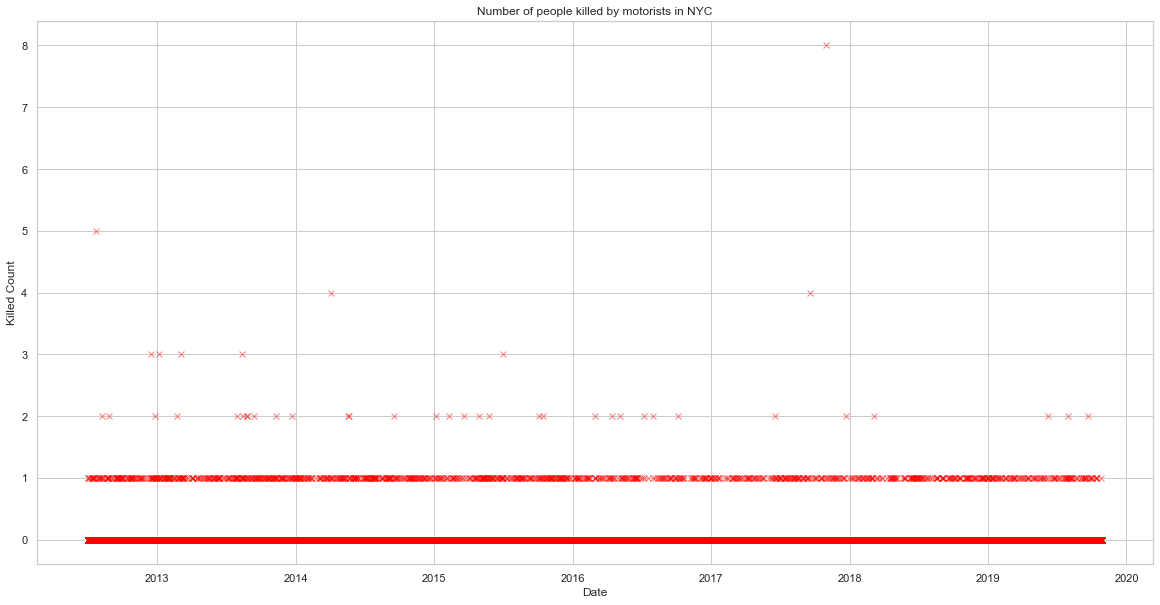

In [93]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20,10)) # Create the plot space upon which to plot the data
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

x = counted_lethal_crashes['date']
y = counted_lethal_crashes['persons_killed']

ax.plot(x,y,
        linestyle='',
        marker='x',
        alpha = 0.5,
        color='Red'
       )

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Killed Count",
       title="Number of people killed by motorists in NYC")

plt.show()

We have succesfully plotted the Car crash fatalities in NYC over time!

We can see from this that the majority of crashes have either 0 or 1 persons killed. Though there are some outliers. We could plug other columns into this chart, and see distributions of pedestrians, cyclists, motorists killed, but it will be easier and more visually appealing with pandas and seaborn. Here it is hard to get a precise view of the data, though it does help us know where to look.

## Contributing factors to crash fatalities

Next we'll look into the causes of fatal car crashes. We'll start by creating a new dataframe that groups those causes.

In [74]:
counted_lethal_crash_factors = clean_nyc1.groupby('contributing_factor_vehicle_1').persons_killed.sum().reset_index().sort_values("persons_killed", ascending = False)
counted_lethal_crash_factors.head()

,contributing_factor_vehicle_1,persons_killed
55,unspecified,678
11,driver inattention/distraction,220
17,failure to yield right-of-way,172
51,traffic control disregarded,172
54,unsafe speed,142


Finally, let's drop 0's if we have any.

In [75]:
counted_lethal_crash_factors.tail()

,contributing_factor_vehicle_1,persons_killed
9,cell phone (hand-held),0
8,brakes defective,0
6,animals action,0
3,accelerator defective,0
59,windshield inadequate,0


Yes, let's remove those zero values now.

In [76]:
counted_lethal_crash_factors = counted_lethal_crash_factors[counted_lethal_crash_factors.persons_killed != 0]
counted_lethal_crash_factors.tail()

,contributing_factor_vehicle_1,persons_killed
28,obstruction/debris,2
13,driverless/runaway vehicle,2
36,passing too closely,2
33,oversized vehicle,1
49,tow hitch defective,1


Great. Now let's Visualize Fatal Car Crash Causes in NYC.

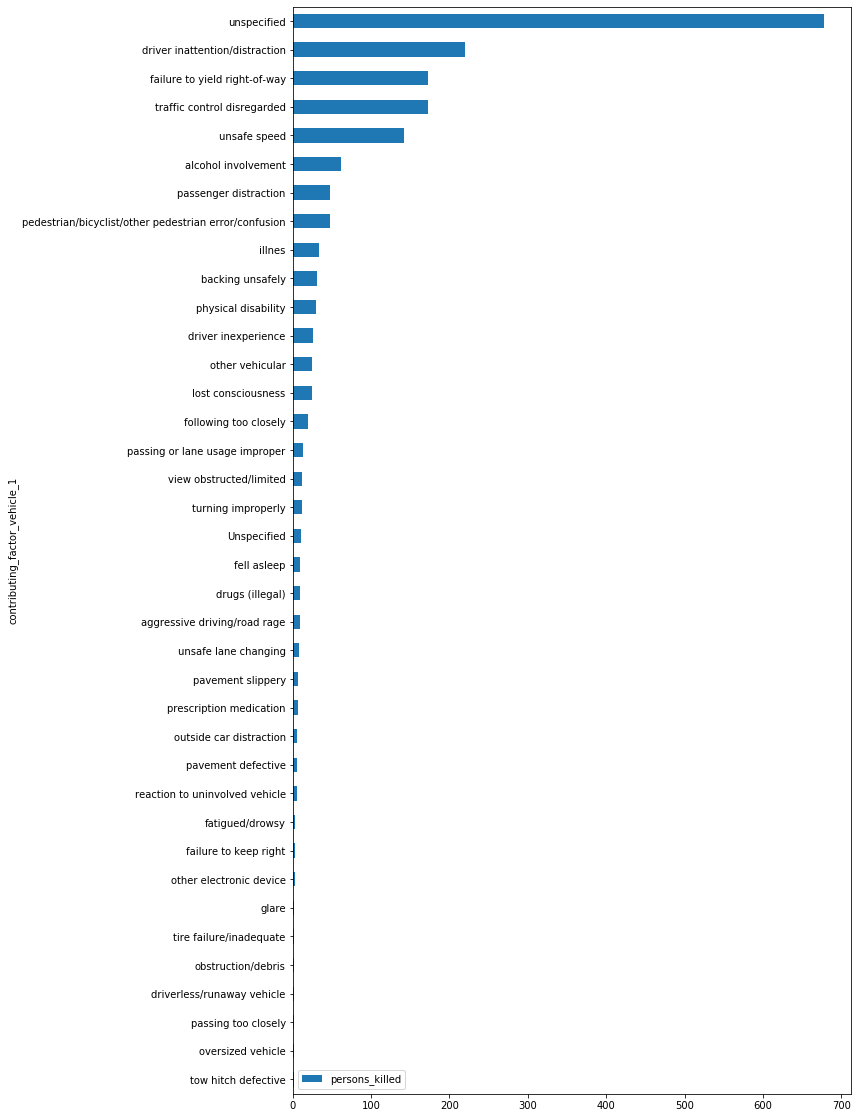

In [77]:
counted_lethal_crash_factors.plot.barh("contributing_factor_vehicle_1", 
                                      "persons_killed",
                                      figsize = (10,20)
                                      ).invert_yaxis()

This horizontal bar chart gives a slightly better sense of the data, that fatal accidents are mostly caused by driver's bad behaviours, or are unrecorded.

This is of course only looking at fatal accidents, only at the first recorded cause, and the reports are likely not 100% reliable. However, if NYC's government wanted to do more to reduce fatalities, this is useful information.

## Fatalities to pedestrians vs cyclists vs motorist

We'll switch to Seaborn for the rest of our work, which allows for greater range and easier user controls.

For this we'll compare the distributions of fatalities by the category of person killed. We'll group each category from our original dataframe into it's own dataframe. We will then add a column to each dataframe which creates a running total of persons killed, using the cumsum function.

In [78]:
killed_motorists = clean_nyc1.groupby('date').motorist_killed.sum().reset_index()
killed_motorists['sum'] = killed_motorists['motorist_killed'].cumsum()

killed_cyclist = clean_nyc1.groupby('date').cyclist_killed.sum().reset_index()
killed_cyclist['sum'] = killed_cyclist['cyclist_killed'].cumsum()

killed_pedestrians = clean_nyc1.groupby('date').pedestrians_killed.sum().reset_index()
killed_pedestrians['sum'] = killed_pedestrians['pedestrians_killed'].cumsum()

Now we can plot these using Seaborn, a library built to handle python data visualizations.

For this graph, we will overlay the rolling sum of fatalities (grouped by travel type) on the same graph, to get a sense of relative danger.

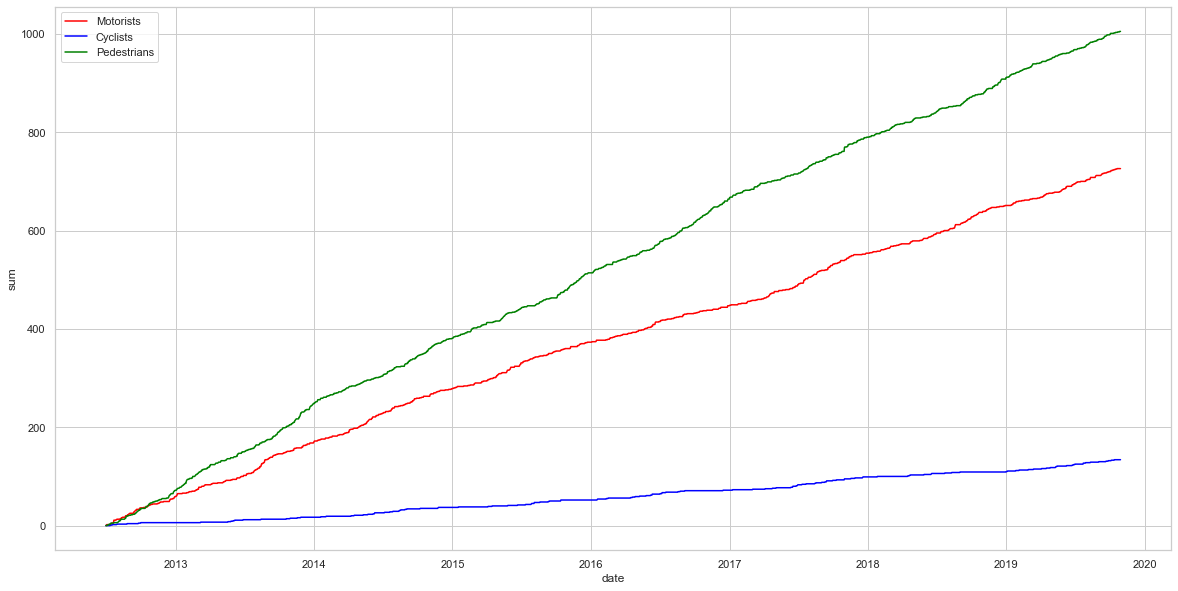

In [79]:
import seaborn as sns
sns.set(style="whitegrid")

fig, ax = plt.subplots(figsize=(20, 10))

sns.lineplot(x='date', y='sum', color = 'red', data=killed_motorists, ax=ax)
sns.lineplot( x='date', y='sum', color = 'blue', data=killed_cyclist, ax=ax)
sns.lineplot( x='date', y='sum', color = 'green', data=killed_pedestrians, ax=ax)
ax.legend(['Motorists', 'Cyclists', 'Pedestrians'], facecolor='w')

plt.show()

This is interesting. More pedestrians are killed than motorists by car crashes. I guess that is not entirely surprising, but it is disheartening.

This analysis lends itself well to comparing injury rates as well, which we would expect to be significantly higher.

Assuming there was more time, further analysis into the rates of change in the fatality set (to see if NYC is getting safer or more dangerous) would be manageable with another function over these data sets.

## Average of deaths by borough

Let's see the average of killed persons by borough with the collisions count.

In [80]:
clean_nyc1.groupby('borough').persons_killed.agg(['count', 'mean'])

,count,mean
borough,,
bronx,154882,0.001027
brooklyn,345357,0.001144
manhattan,267529,0.000826
queens,296095,0.001209
staten island,48351,0.001344


Let's graph this with a bar chart.

Text(0.5, 0, ' ')

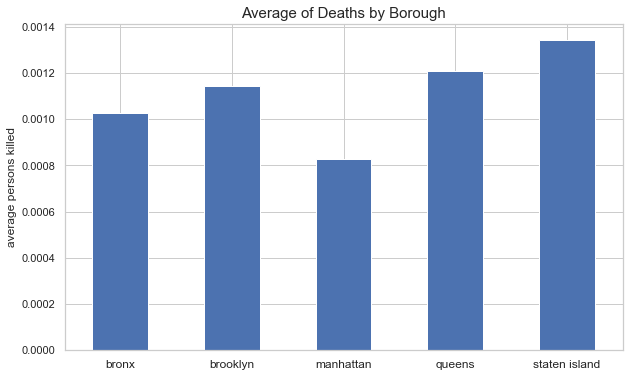

In [81]:
import matplotlib.pyplot as plt
%matplotlib inline
clean_nyc1.groupby('borough').persons_killed.mean().plot(kind='bar', figsize=(10, 6))
plt.ylabel('average persons killed')
plt.title('Average of Deaths by Borough', fontsize=15)
plt.xticks(rotation=0, fontsize='large')
plt.xlabel(' ')

It looks like Staten Island and Queens have the highest number of deaths, meanwhile Manhattan has the lowest number of deaths, which can be due to its smaller size.

## Average number of deaths by hour

Let's see the mean of persons killed by hour. We are interested in seeing the percentage rate of persons killed for each hour. We want to see this information hourly to get a better general idea. To do so, we will first drop the missing values in the 'date' and 'time' columns and change their data types from integer to string. Then, create a new column named 'combined', which will combine 'date' and 'time' columns into the same panda series. Finally, take that series and convert it to datetime data type and store it in a new column called 'combined_date_time'. That will allow us to get the hours when graphing it.

In [82]:
clean_nyc1.dropna(subset = ['date'], how='all', inplace=True)
clean_nyc1.dropna(subset = ['time'], how='all', inplace=True)
clean_nyc1['date'] = clean_nyc1.date.astype(str)
clean_nyc1['time'] = clean_nyc1.time.astype(str)
clean_nyc1.head()

,date,time,borough,zip_code,latitude,longitude,location,persons_injured,persons_killed,pedestrians_injured,pedestrians_killed,cyclist_injured,cyclist_killed,motorist_injured,motorist_killed,contributing_factor_vehicle_1,contributing_factor_vehicle_2,vehicle_type_code1,vehicle_type_code2,season
0,2019-08-08,20:27,manhattan,10033.0,40.848118,-73.930890,point (-73.93089 40.848118),0,0,0,0,0,0,0,0,driver inattention/distraction,driver inattention/distraction,sedan,station wagon/sport utility vehicle,Summer
1,2019-08-30,19:00,NaN,nan,40.743214,-73.951350,point (-73.95135 40.743214),0,0,0,0,0,0,0,0,failure to yield right-of-way,unspecified,sedan,sedan,Summer
2,2019-08-18,17:56,NaN,nan,40.839725,-73.783700,point (-73.7837 40.839725),1,0,0,0,0,0,1,0,unspecified,unspecified,sedan,station wagon/sport utility vehicle,Summer
3,2019-09-02,1:00,brooklyn,11208.0,40.670254,-73.857280,point (-73.85728 40.670254),0,0,0,0,0,0,0,0,failure to yield right-of-way,unspecified,sedan,NaN,Autumn
4,2019-08-08,14:30,NaN,nan,40.728603,-74.005325,point (-74.005325 40.728603),0,0,0,0,0,0,0,0,driver inattention/distraction,unspecified,bus,box truck,Summer


In [83]:
combined = clean_nyc1.date.str.cat(clean_nyc1.time, sep= ' ')
combined.head()

0    2019-08-08 20:27
1    2019-08-30 19:00
2    2019-08-18 17:56
3     2019-09-02 1:00
4    2019-08-08 14:30
Name: date, dtype: object

In [84]:
clean_nyc1['combined_date_time'] = pd.to_datetime(combined)

In [85]:
clean_nyc1.dtypes

date                                     object
time                                     object
borough                                  object
zip_code                                 object
latitude                                float64
longitude                               float64
location                                 object
persons_injured                           int64
persons_killed                            int64
pedestrians_injured                       int64
pedestrians_killed                        int64
cyclist_injured                           int64
cyclist_killed                            int64
motorist_injured                          int64
motorist_killed                           int64
contributing_factor_vehicle_1            object
contributing_factor_vehicle_2            object
vehicle_type_code1                       object
vehicle_type_code2                       object
season                                   object
combined_date_time               datetim

Text(0.5, 0, 'time')

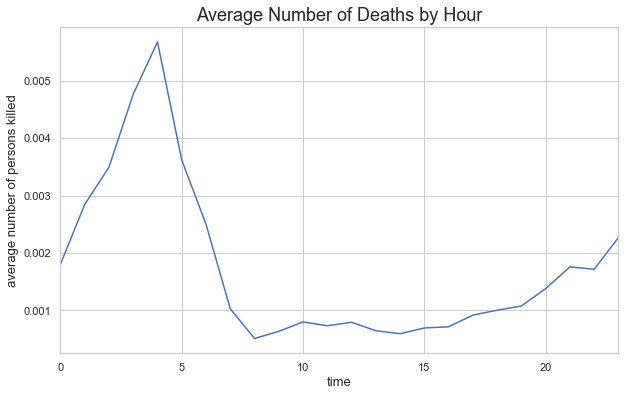

In [86]:
clean_nyc1.groupby(clean_nyc1.combined_date_time.dt.hour).persons_killed.mean().plot(figsize=(10, 6))
plt.title('Average Number of Deaths by Hour', fontsize=18)
plt.ylabel('average number of persons killed', fontsize=13)
plt.xlabel('time', fontsize=13)

It looks like number of deaths goes up around 4:00 in the morning and 23:00 in the evening. It decreases during the day between 8:00 and 14:00, which are typical work hours.

## Pedestrian injuries in Brooklyn due to driver inexperience

Finally, we will import the data set from nypd motor vehicle crash and limit 30,000 rows and looking at the values containing Brooklyn (borough of occurance) and Driver Inexperience (for contributing factor vehicle 1) This will allow us to work with some of the dataset and look at crashes involving driver inexperience in the borough of Brooklyn.

In [87]:
mv_data = pd.read_csv('https://data.cityofnewyork.us/resource/h9gi-nx95.csv?$limit=30000&borough=BROOKLYN&contributing_factor_vehicle_1=Driver%20Inexperience')


Let's check it.

In [88]:
mv_data.head()

,date,time,borough,zip_code,latitude,longitude,location,on_street_name,off_street_name,cross_street_name,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,contributing_factor_vehicle_1,contributing_factor_vehicle_2,contributing_factor_vehicle_3,contributing_factor_vehicle_4,contributing_factor_vehicle_5,unique_key,vehicle_type_code1,vehicle_type_code2,vehicle_type_code_3,vehicle_type_code_4,vehicle_type_code_5
0,2019-08-11T00:00:00.000,11:23,BROOKLYN,11233,40.671160,-73.917000,POINT (-73.917 40.67116),NaN,NaN,430 SARATOGA AVENUE,2,0,0,0,0,0,2,0,Driver Inexperience,Unspecified,NaN,NaN,NaN,4187672,Sedan,Sedan,NaN,NaN,NaN
1,2019-08-10T00:00:00.000,23:55,BROOKLYN,11230,40.611960,-73.968160,POINT (-73.96816 40.61196),OCEAN PARKWAY,AVENUE O,NaN,0,0,0,0,0,0,0,0,Driver Inexperience,Unspecified,NaN,NaN,NaN,4187257,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN
2,2019-08-12T00:00:00.000,23:00,BROOKLYN,11217,40.684050,-73.977460,POINT (-73.97746 40.68405),FLATBUSH AVENUE,ATLANTIC AVENUE,NaN,0,0,0,0,0,0,0,0,Driver Inexperience,Unspecified,NaN,NaN,NaN,4187842,Pick-up Truck,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
3,2019-08-16T00:00:00.000,6:27,BROOKLYN,11203,40.652855,-73.945915,POINT (-73.945915 40.652855),EAST 34 STREET,LINDEN BOULEVARD,NaN,0,0,0,0,0,0,0,0,Driver Inexperience,Alcohol Involvement,Unspecified,NaN,NaN,4190476,Sedan,Sedan,Sedan,NaN,NaN
4,2019-08-24T00:00:00.000,2:50,BROOKLYN,11206,40.695614,-73.940560,POINT (-73.94056 40.695614),VERNON AVENUE,MARCUS GARVEY BOULEVARD,NaN,1,0,0,0,1,0,0,0,Driver Inexperience,Failure to Yield Right-of-Way,NaN,NaN,NaN,4201737,Sedan,Bike,NaN,NaN,NaN


Now we can find the unique types of vehicles involved in these crashes. Let's look at vehcile number one, the first vehicle impacting. This column value is vehicle_type_code1.

In [89]:
mv_data['vehicle_type_code1'].unique()

array(['Sedan', 'Station Wagon/Sport Utility Vehicle', 'Pick-up Truck',
       'Taxi', 'E-Sco', 'DELIV', 'Box Truck', 'E-Bik', 'Ambulance',
       'PASSENGER VEHICLE', 'SPORT UTILITY / STATION WAGON', 'BU', 'TAXI',
       'AM', 'PICK-UP TRUCK', 'Garbage or Refuse', 'Trail', 'Moped', nan,
       'Tractor Truck Gasoline', 'Van', 'MOPED', 'Chassis Cab',
       'Tractor Truck Diesel', 'Bus', 'Dump', 'Motorbike', 'Motorscooter',
       'BUS', 'OTHER', 'Motorcycle', 'usps', 'Minicycle', 'TRUCK', 'Bike',
       'MOPD', 'tow t', 'PK', 'STREE', 'CRANE', 'TRACK', 'Flat Bed',
       'Tow Truck / Wrecker', 'Carry All', '3-Door', 'Ambul', 'NYPD',
       'GG', 'CONV', 'DS', 'VN', 'SMALL COM VEH(4 TIRES) ', 'UNKNOWN',
       'Convertible', 'FDNY', 'motor', 'FIRE', 'VAN', 'LIVERY VEHICLE',
       'MOTORCYCLE', 'LARGE COM VEH(6 OR MORE TIRES)', 'UTILI', 'TOW',
       'CB', 'TOW T', 'TK', 'MS', 'Tanker', 'BULLD', 'FB', 'LL', 'DP',
       'BICYCLE', 'FORKL', 'RESCU', 'SCOOTER', '4 dr sedan', 'AMBULANCE',

We can further narrow what we are looking at by selecting for vehicle types. We can look at Station Wagon/Sport Utility Vehicle and Sedan. So, in Brooklyn for inexperienced drivers, what can we see for this group driving Station Wagon/Sport Utility Vehicle versus driving a sedan.

In [90]:
mv_data['vehicle_type_code1'].value_counts()

PASSENGER VEHICLE                      2110
SPORT UTILITY / STATION WAGON           859
Sedan                                   555
Station Wagon/Sport Utility Vehicle     392
SMALL COM VEH(4 TIRES)                   75
OTHER                                    70
PICK-UP TRUCK                            68
VAN                                      64
TAXI                                     49
LARGE COM VEH(6 OR MORE TIRES)           45
UNKNOWN                                  43
BUS                                      35
MOTORCYCLE                               35
Pick-up Truck                            35
Taxi                                     31
Box Truck                                30
Bus                                      20
Tractor Truck Diesel                     15
Van                                      12
LIVERY VEHICLE                           12
BU                                        9
TK                                        8
Motorcycle                      

So for Brooklyn and crashes due to inexperienced drivers, passenger vehicle, sports utility/station wagon, sedan, and then station wagon/sport utility were the largest number of vehicles involved in the crashes. We could maybe combine sports utility/station wagon and station wagon/sport utility groups.

In [91]:
mv_data['vehicle_type_code1'] = mv_data['vehicle_type_code1'].str.replace('SPORT UTILITY / STATION WAGON', 'SUV')
mv_data['vehicle_type_code1'] = mv_data['vehicle_type_code1'].str.replace('Station Wagon/Sport Utility Vehicle', 'SUV')

Let's look at this same information with seaborn data visualization tool.

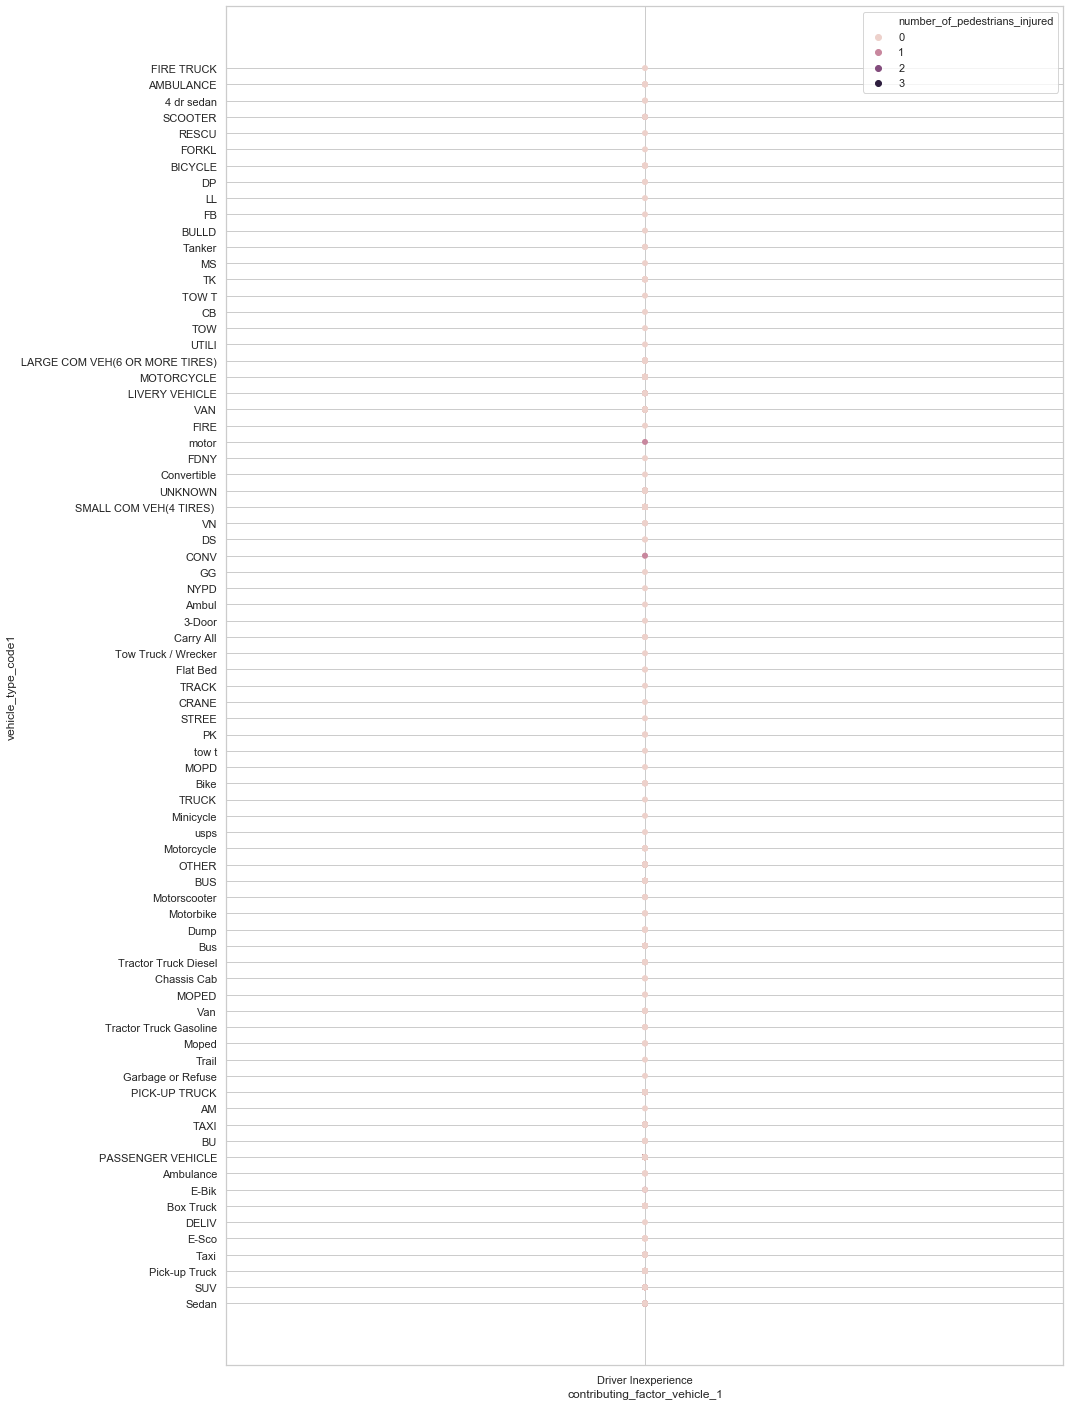

In [92]:
f, ax = plt.subplots(figsize=(15, 25))
sns.scatterplot(x="contributing_factor_vehicle_1", y="vehicle_type_code1", 
               hue="number_of_pedestrians_injured", linewidth=0, data=mv_data, ax=ax)

So, it looks like for this particular item, crashes with driver inexperience, most vehicles did not have pedestrian injuries. Livery vehicles had 1 pedestrian injury and "motor" (what is motor compared to motor vehicle, I'm not sure) had 1 pedestrian injury.